In [14]:
import symforce.symbolic as sf
from plot_symforce import plot_pose3_on_axes, set_axes_equal, plot_line
import matplotlib.pyplot as plt



# Compute forward kinematics of RR robot

In [31]:
#define joints
q1 = sf.symbols('q1')
q2 = sf.symbols('q2')

O = sf.Pose3_SE3()
A = O * sf.Pose3_SE3(sf.Rot3.from_yaw_pitch_roll(0,0,q1), sf.V3([0,0,1]))
B = A * sf.Pose3_SE3(sf.Rot3.from_yaw_pitch_roll(0,0,q2), sf.V3([0,0,1]))
C = B * sf.Pose3_SE3(sf.Rot3(), sf.V3([0,0,1]))

print(f"C_R = \n{C.R.to_rotation_matrix().simplify()}")
print(f"C_t = \n{C.t.simplify()}")

symbolic.simplify():472 WARNING -- Converting to sympy to use .simplify
symbolic.simplify():472 WARNING -- Converting to sympy to use .simplify


C_R = 
[1, 0, 0]
[0, 1.0*cos(q1 + q2), -1.0*sin(q1 + q2)]
[0, 1.0*sin(q1 + q2), 1.0*cos(q1 + q2)]

C_t = 
[0]
[-1.0*sin(q1) - 1.0*sin(q1 + q2)]
[1.0 + 1.0*cos(q1) + 1.0*cos(q1 + q2)]



# Draw the robot for q1 = pi/4 and q2 = pi/8

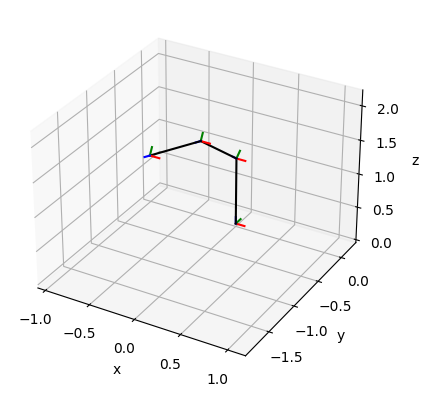

In [30]:
q1val = sf.pi/4
q2val = sf.pi/8
Aval = A.subs(q1, q1val)
Bval = B.subs([q1,q2], [q1val,q2val])
Cval = C.subs([q1,q2], [q1val,q2val])

fig = plt.figure(); 
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')

plot_pose3_on_axes(ax, O); plot_line(ax, O.t,Aval.t)
plot_pose3_on_axes(ax, Aval); plot_line(ax, Aval.t,Bval.t)
plot_pose3_on_axes(ax, Bval); plot_line(ax, Bval.t,Cval.t)
plot_pose3_on_axes(ax, Cval)


set_axes_equal(ax)

# Your turn now:

Please compute the forward kinematics, and draw the following robot.
Assume ground plane is [X,Y]

![serial](serial.png)